# To predict whether a person will have diabetes or not

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Load the data

In [5]:
data=pd.read_csv('diabetes1.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Basic checks

In [12]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# Statistical information of data

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 1. No missing values
### 2. 0 value not possible for glucose,BP,skin thickness and insulin. This is called as data corruption

# Exploratory data Analysis

<Axes: xlabel='Pregnancies', ylabel='count'>

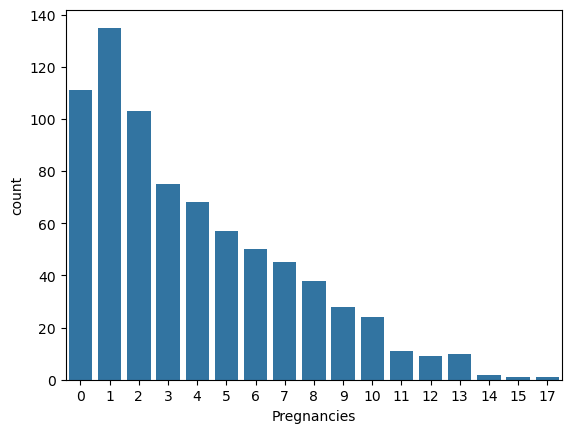

In [11]:
sns.countplot(data=data,x='Pregnancies')

In [31]:
data.Pregnancies.value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

<Axes: xlabel='Glucose', ylabel='Count'>

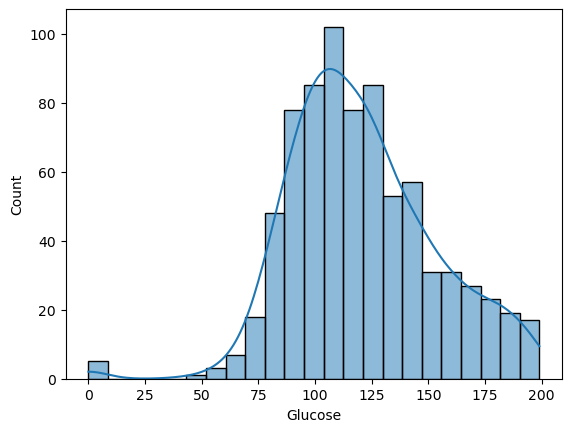

In [33]:
sns.histplot(data['Glucose'],kde=True)

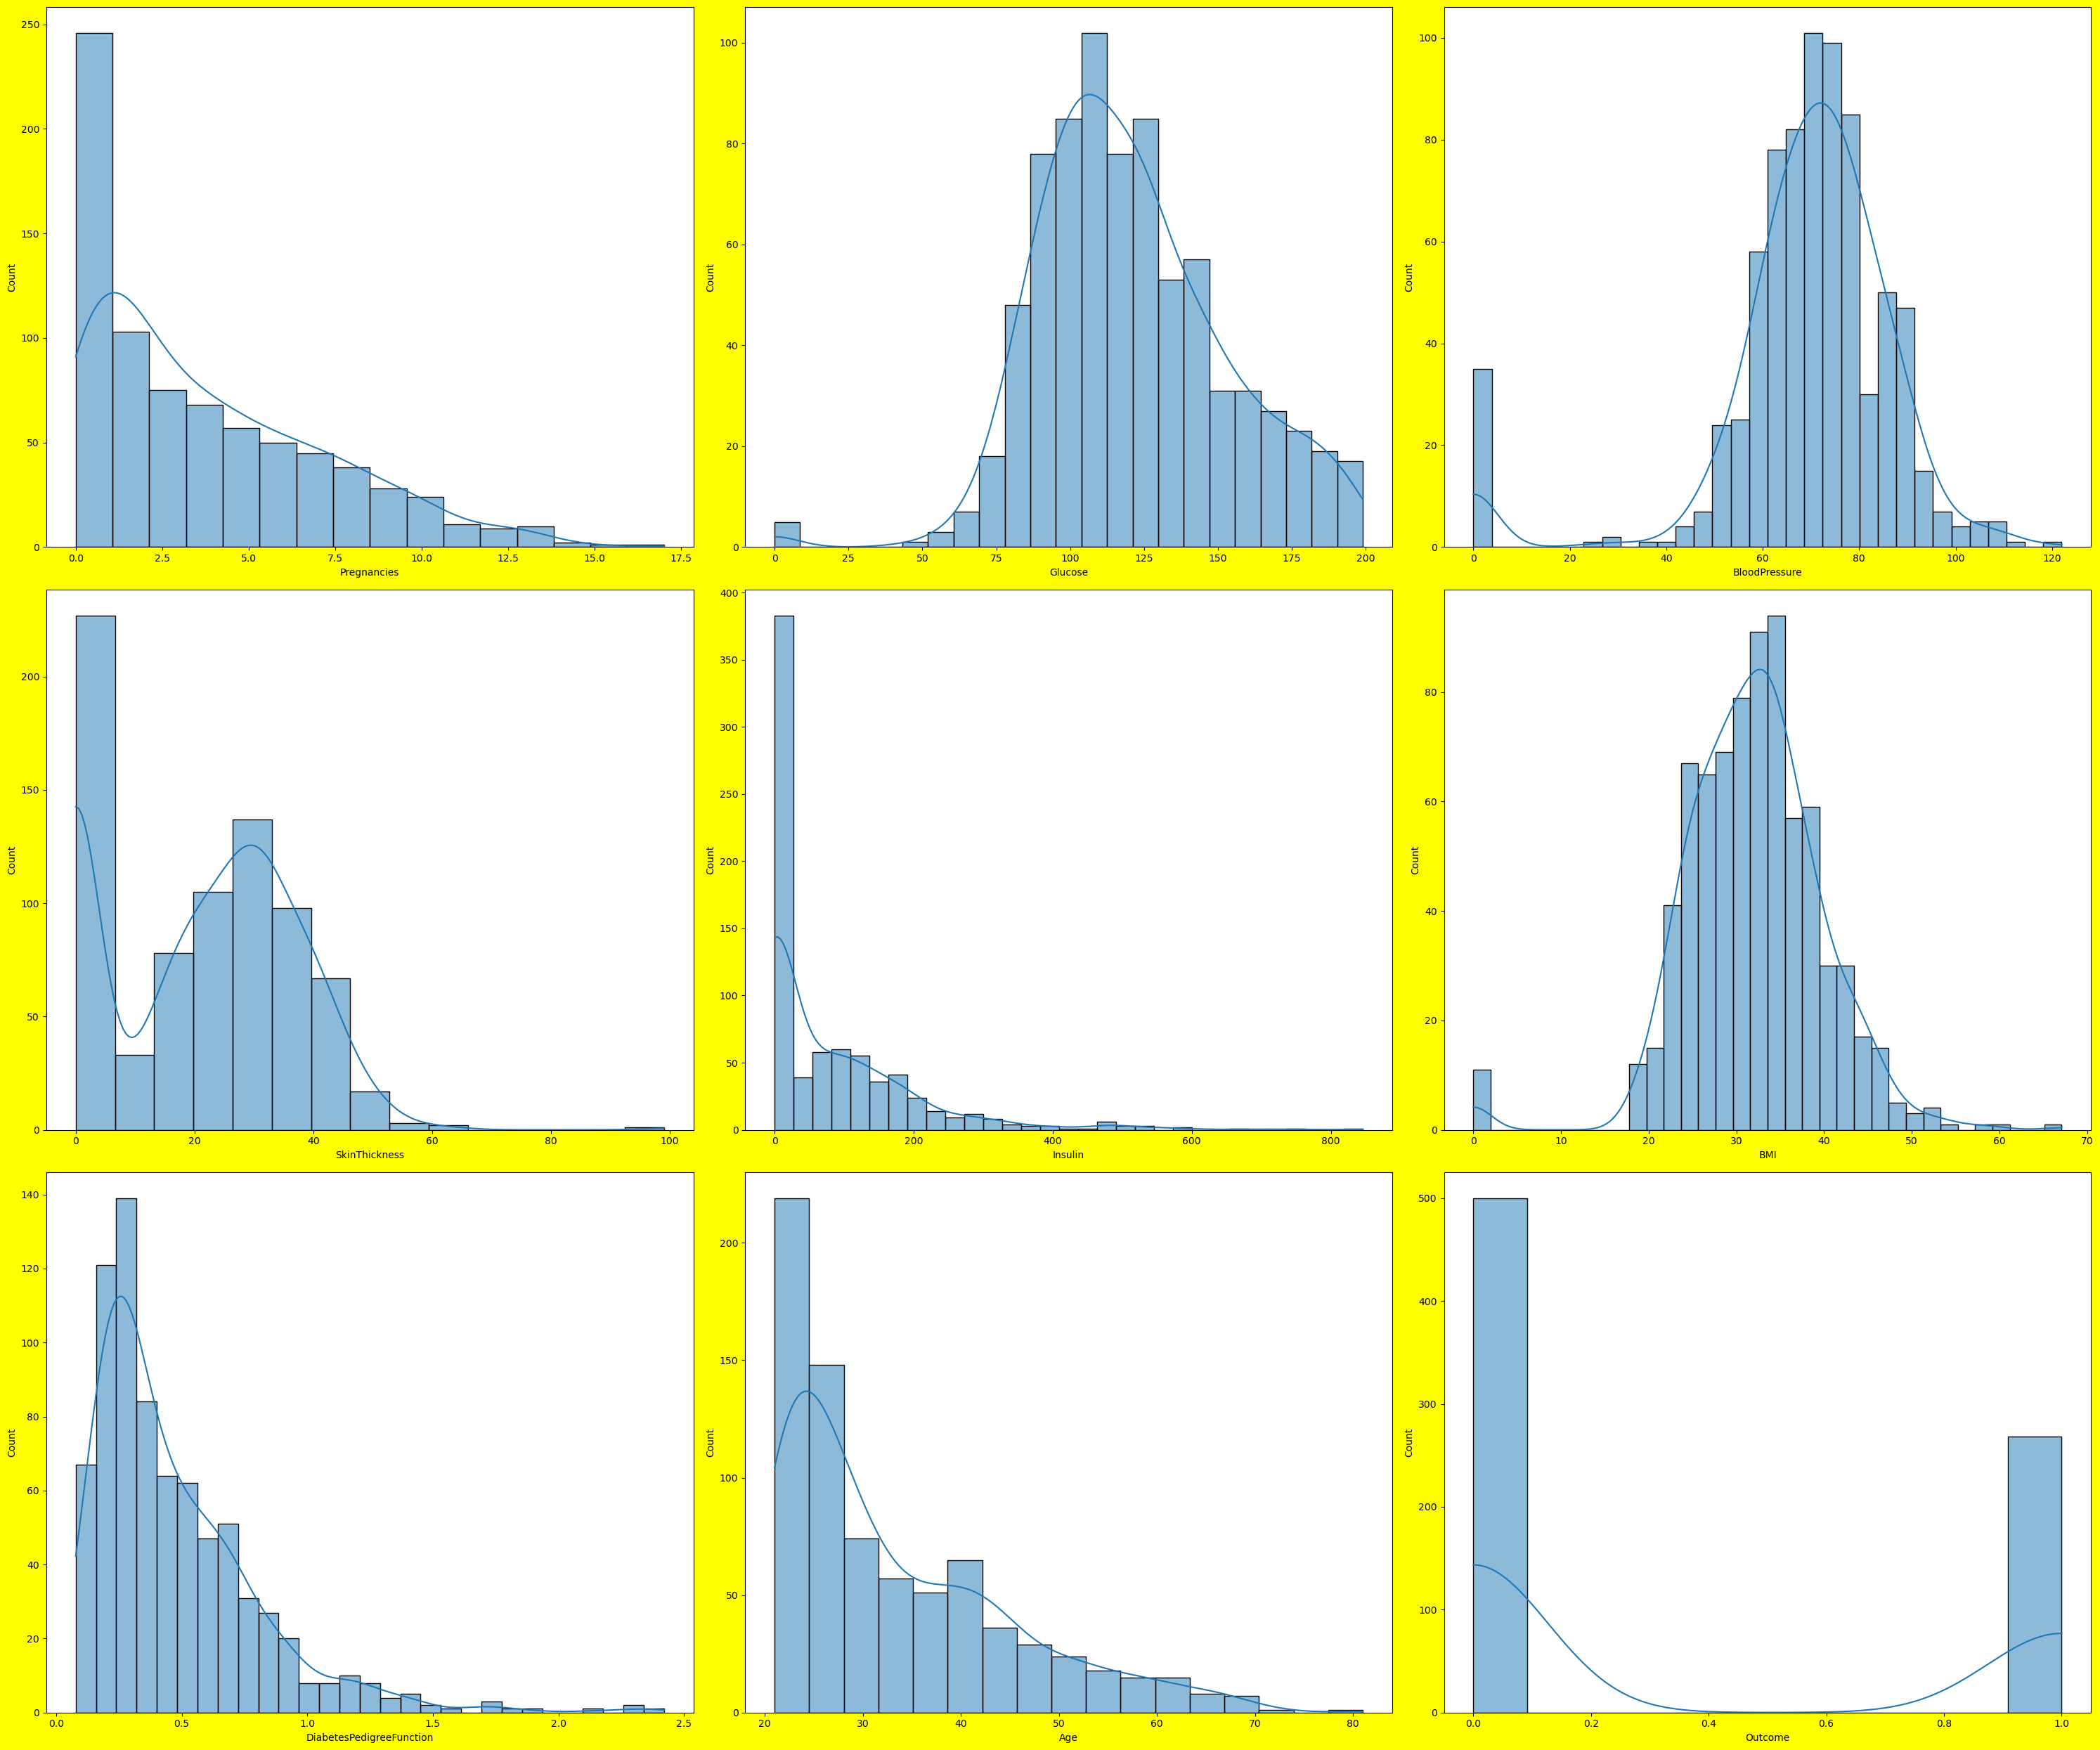

In [45]:
plt.figure(figsize=(30,25),facecolor='yellow')
plotnumber=1

for column in data:
    plt.subplot(3,3,plotnumber)
    sns.histplot(data[column],kde=True)

    plotnumber+=1
plt.tight_layout()    

# Bivariate analysis

<Axes: xlabel='Pregnancies', ylabel='count'>

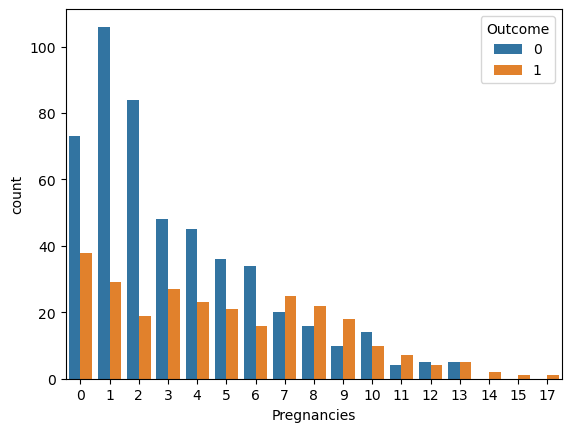

In [50]:
### Analyzing how pregnancies impact the patient with diabetes.

sns.countplot(x='Pregnancies',hue='Outcome',data=data)


### 1.If patient is pregnent , she will get diabetes. But after analyzing this data, we found as the no of pregnencies increases chance of getting diabetes also increases.
### 2.At from 14 to 17 pregnancies all women are diabetic.

<Axes: xlabel='Glucose', ylabel='Age'>

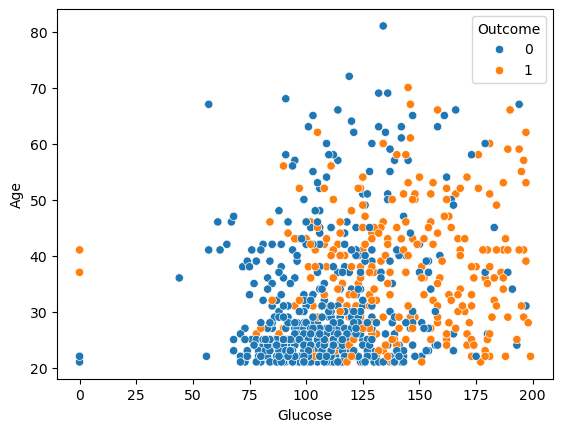

In [9]:
sns.scatterplot(x='Glucose',y='Age',data=data,hue='Outcome')

<Axes: xlabel='Glucose'>

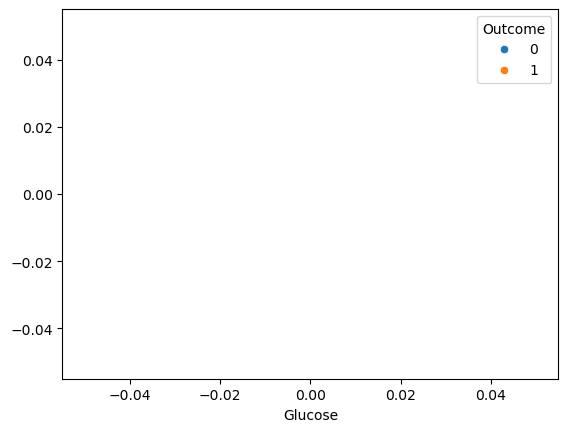

In [11]:
# Analyzing the relationship between the diabetes and Glucose

sns.scatterplot(x='Glucose',data=data,hue='Outcome')

<Axes: xlabel='BloodPressure', ylabel='Count'>

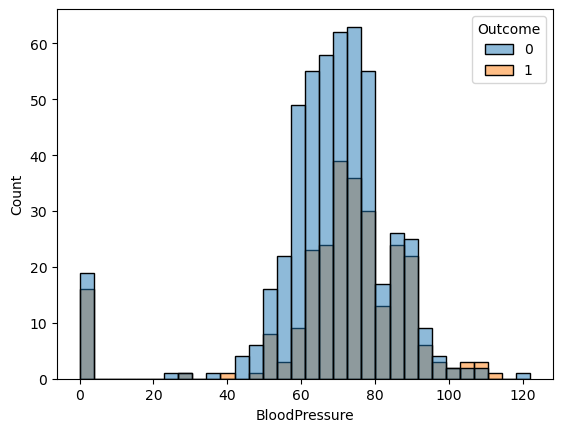

In [13]:
sns.histplot(x='BloodPressure',hue='Outcome',data=data)

### In the given data , a person having glucose range till 100 can be considered as they have lesser chance of getting diabetes.
### The person having glucose range between 100 to 150, he isequally at risk and no risk and we need to analyze more features of the patient
### If the person have glucose more than 150, higher is the chance of getting diabetees

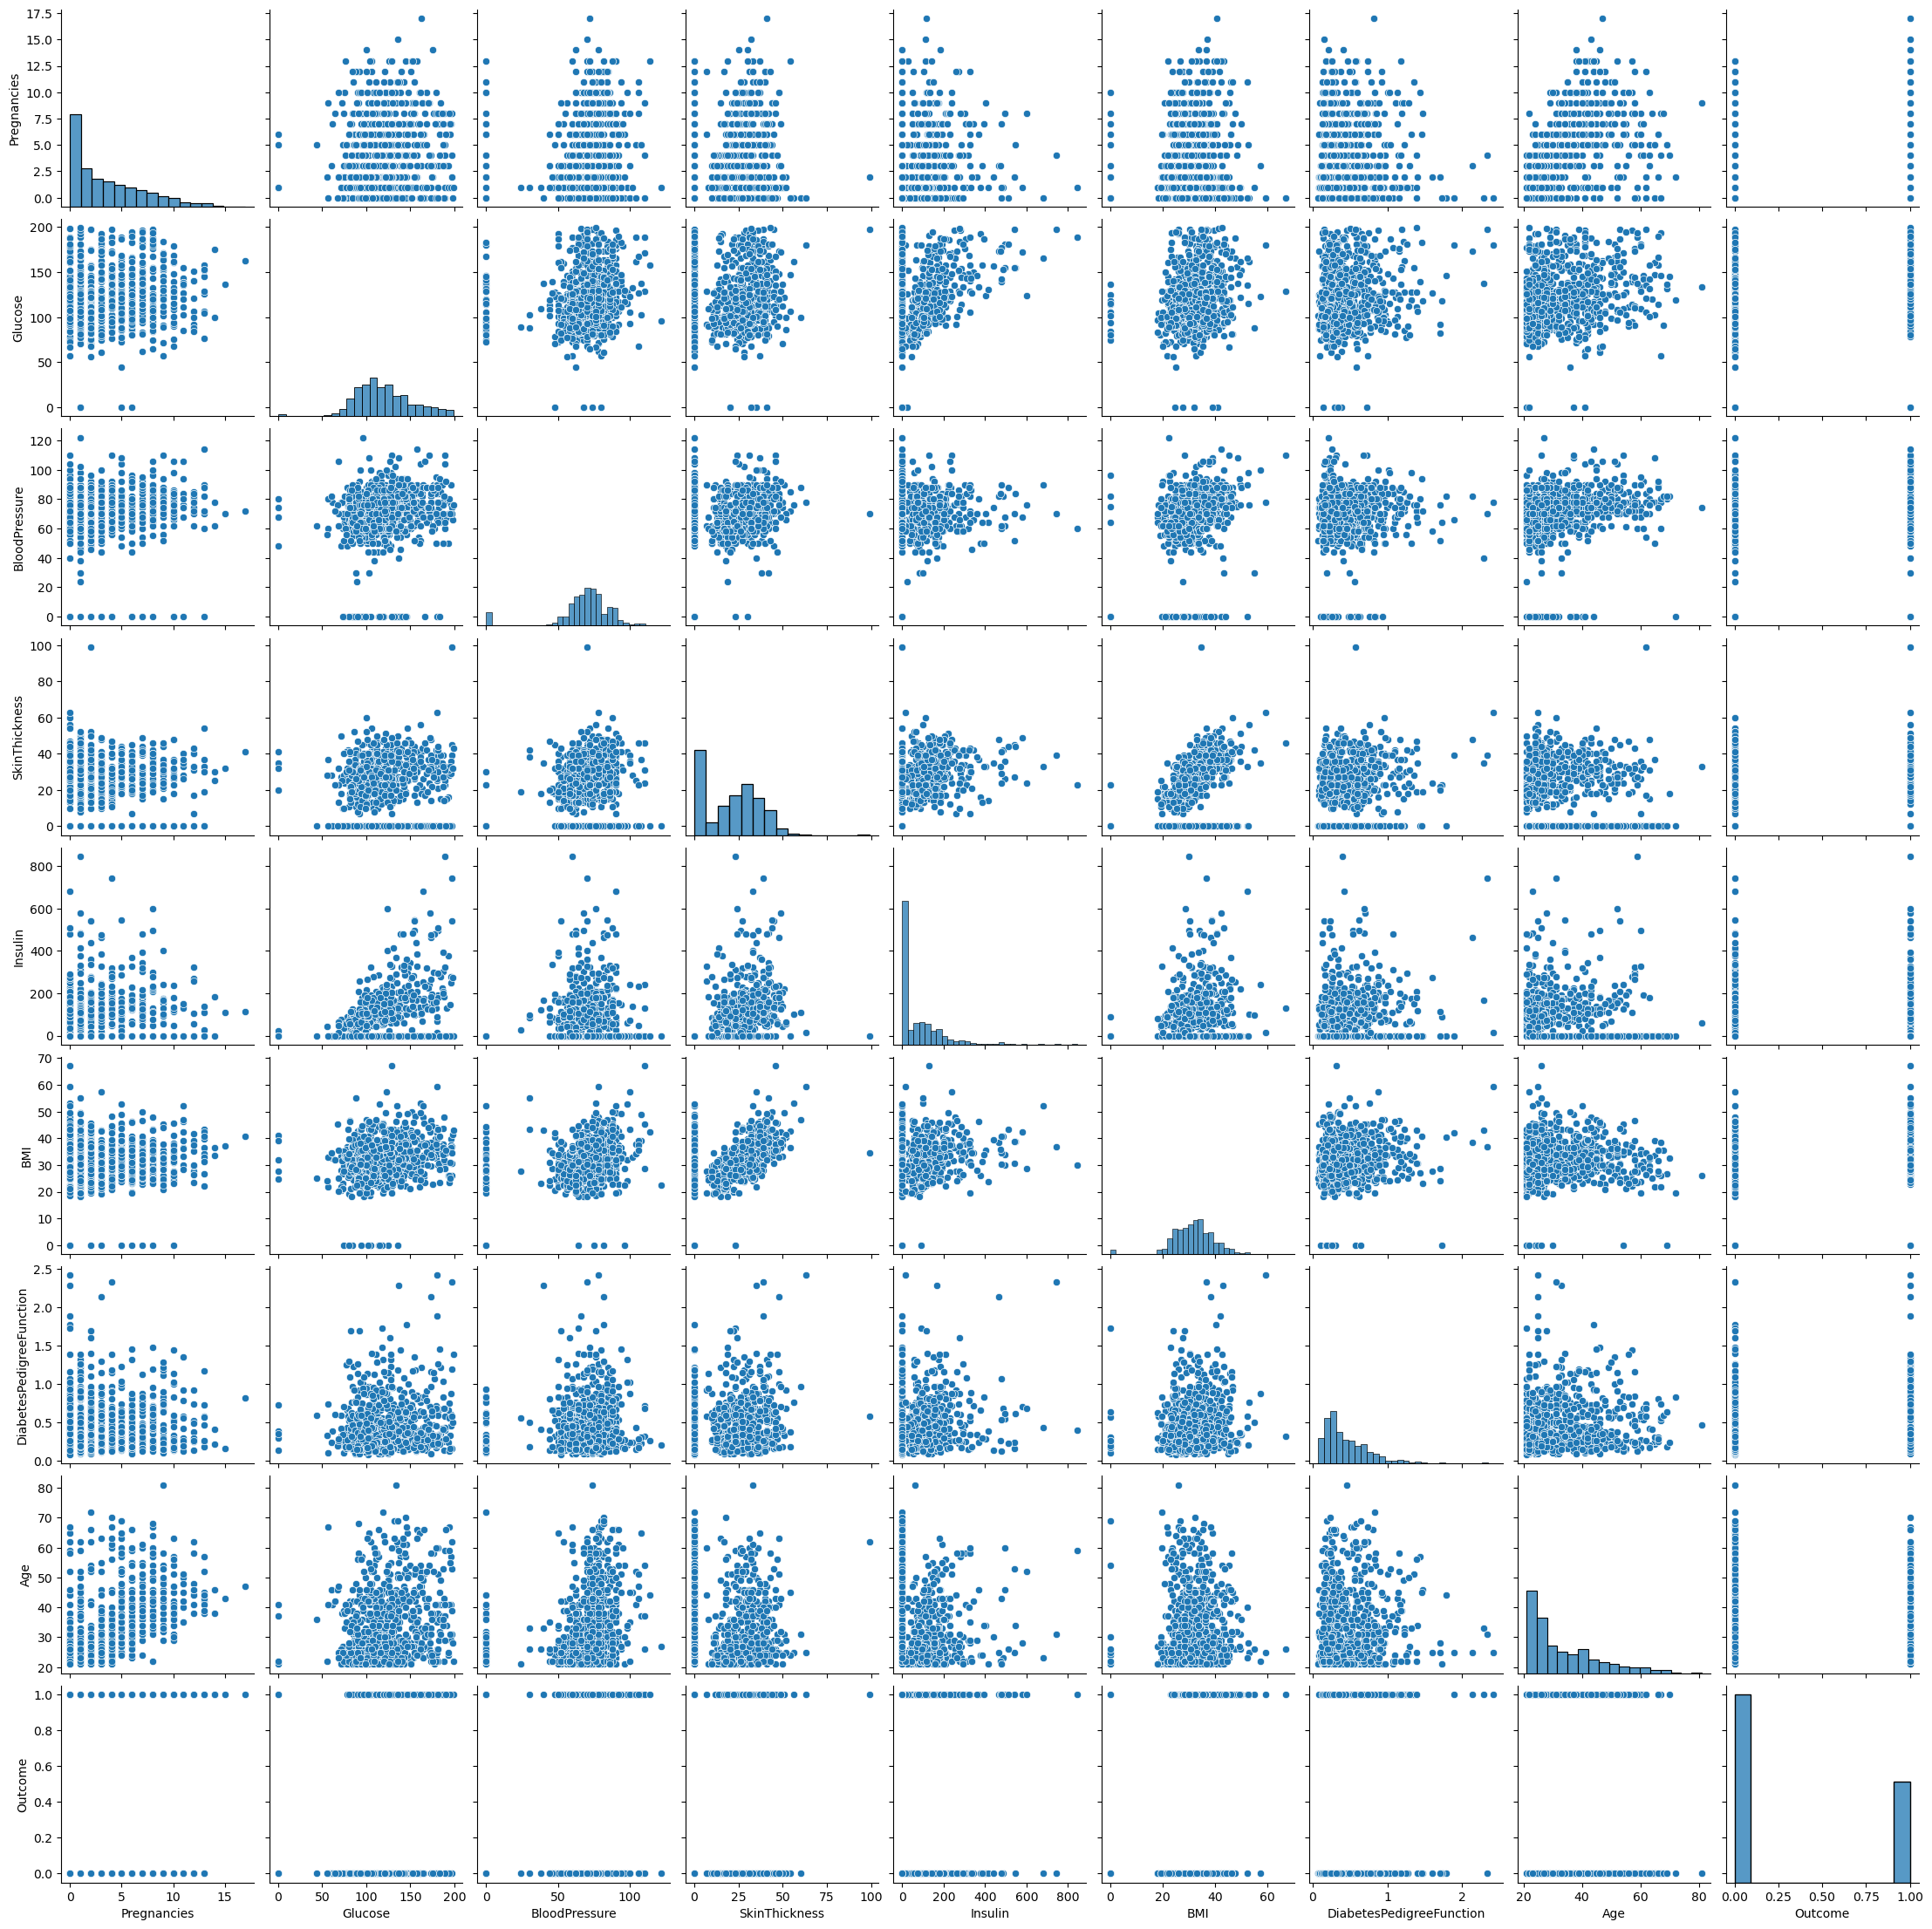

In [16]:
sns.pairplot(data)

<Axes: xlabel='Glucose', ylabel='BloodPressure'>

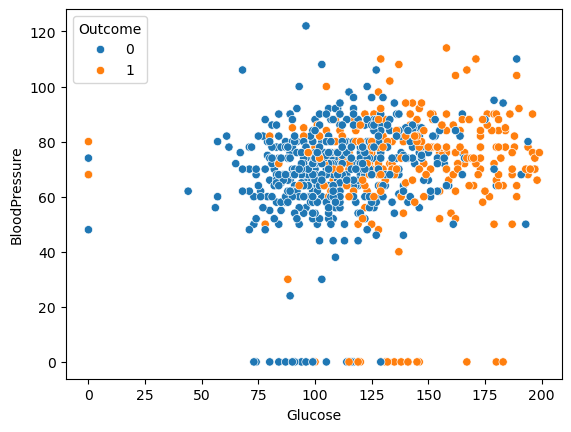

In [18]:
### Analyze Glucose with Bloodpressure

sns.scatterplot(data=data,x='Glucose',y='BloodPressure',hue='Outcome')

### By analyzing BP and Glucose together , we can say we need more features to undersytand if glucose increased to certain level , even if the BP is normal , the person is Diabetic

<Axes: xlabel='Glucose', ylabel='SkinThickness'>

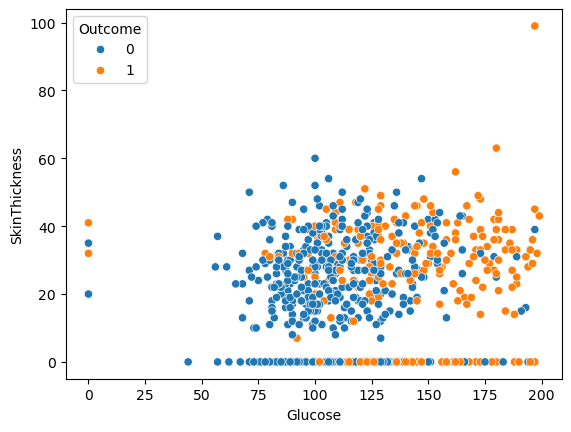

In [20]:
sns.scatterplot(data=data,x='Glucose',y='SkinThickness',hue='Outcome')

### There seem to be no defined relationship between glucose and skin thickness as far as diabetes is concerned from the given data.Thus we need other features to get the relation

<Axes: xlabel='BloodPressure', ylabel='Count'>

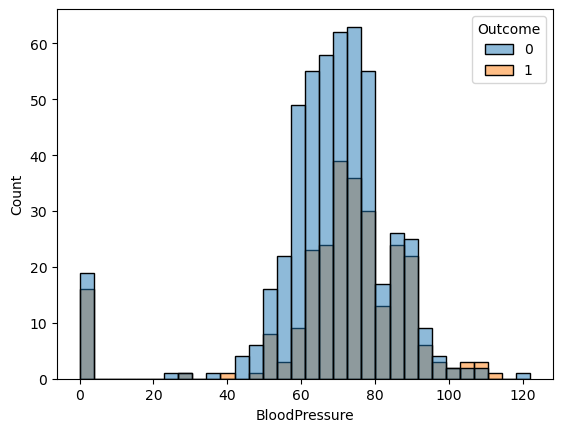

In [22]:
sns.histplot(data=data,x='BloodPressure',hue='Outcome')

### No specific relationship found

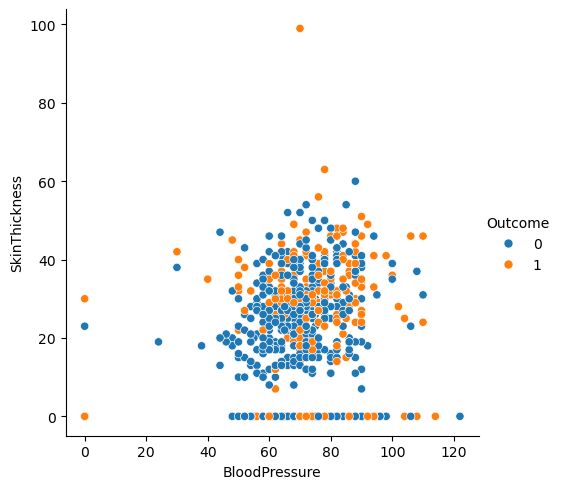

In [27]:
sns.relplot(data=data,x='BloodPressure',y='SkinThickness',hue='Outcome')

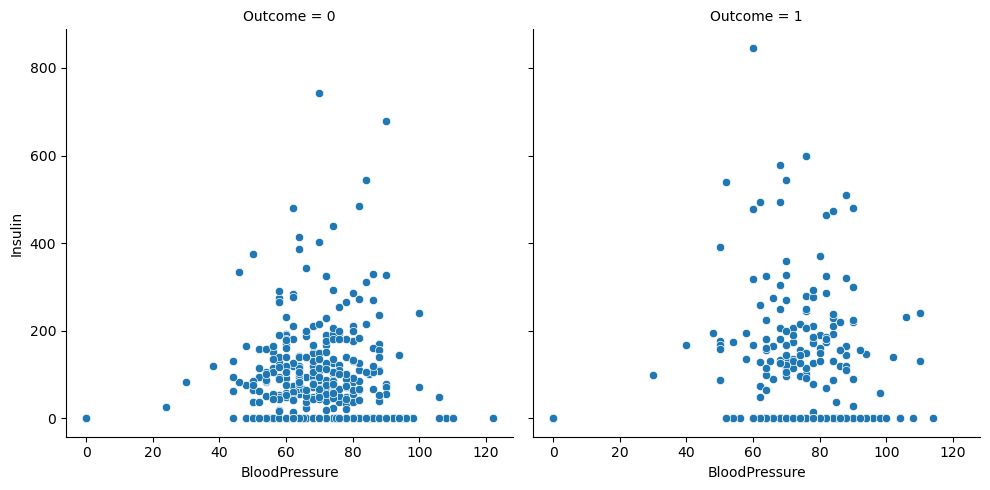

In [31]:
sns.relplot(data=data,x='BloodPressure',y='Insulin',col='Outcome')

<Axes: xlabel='Insulin', ylabel='Count'>

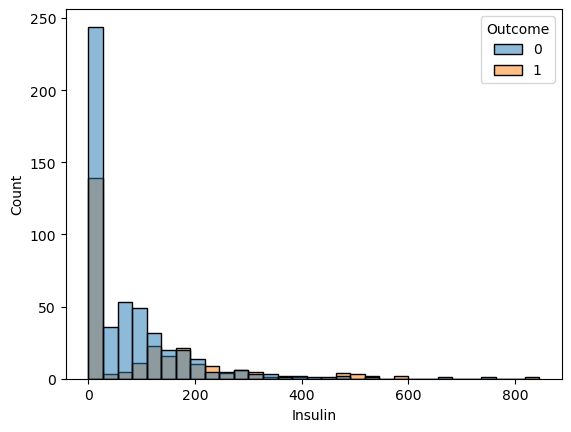

In [33]:
sns.histplot(data=data,x='Insulin',hue='Outcome')

### If the person has Insulin level till 100, mostly he will be non diabetic afterwards, it shows the high requirement of insulin which means the person need more insulin to utilize the access glucose

# Data Preprocessing

In [37]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [41]:
np.median(data['Glucose'])

117.0

In [43]:
### step1.handling missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
#replace

data.loc[data['BMI']==0,'BMI']=np.median(data['BMI'])

In [15]:
data.BloodPressure.replace(0,np.median(data.BloodPressure),inplace=True)
data.SkinThickness.replace(0,np.median(data.SkinThickness),inplace=True)
data.Insulin.replace(0,np.median(data.Insulin),inplace=True)

In [17]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,31.972618,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,0.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [59]:
## step 3- Numerical representation of string data
# ski as not categorical data

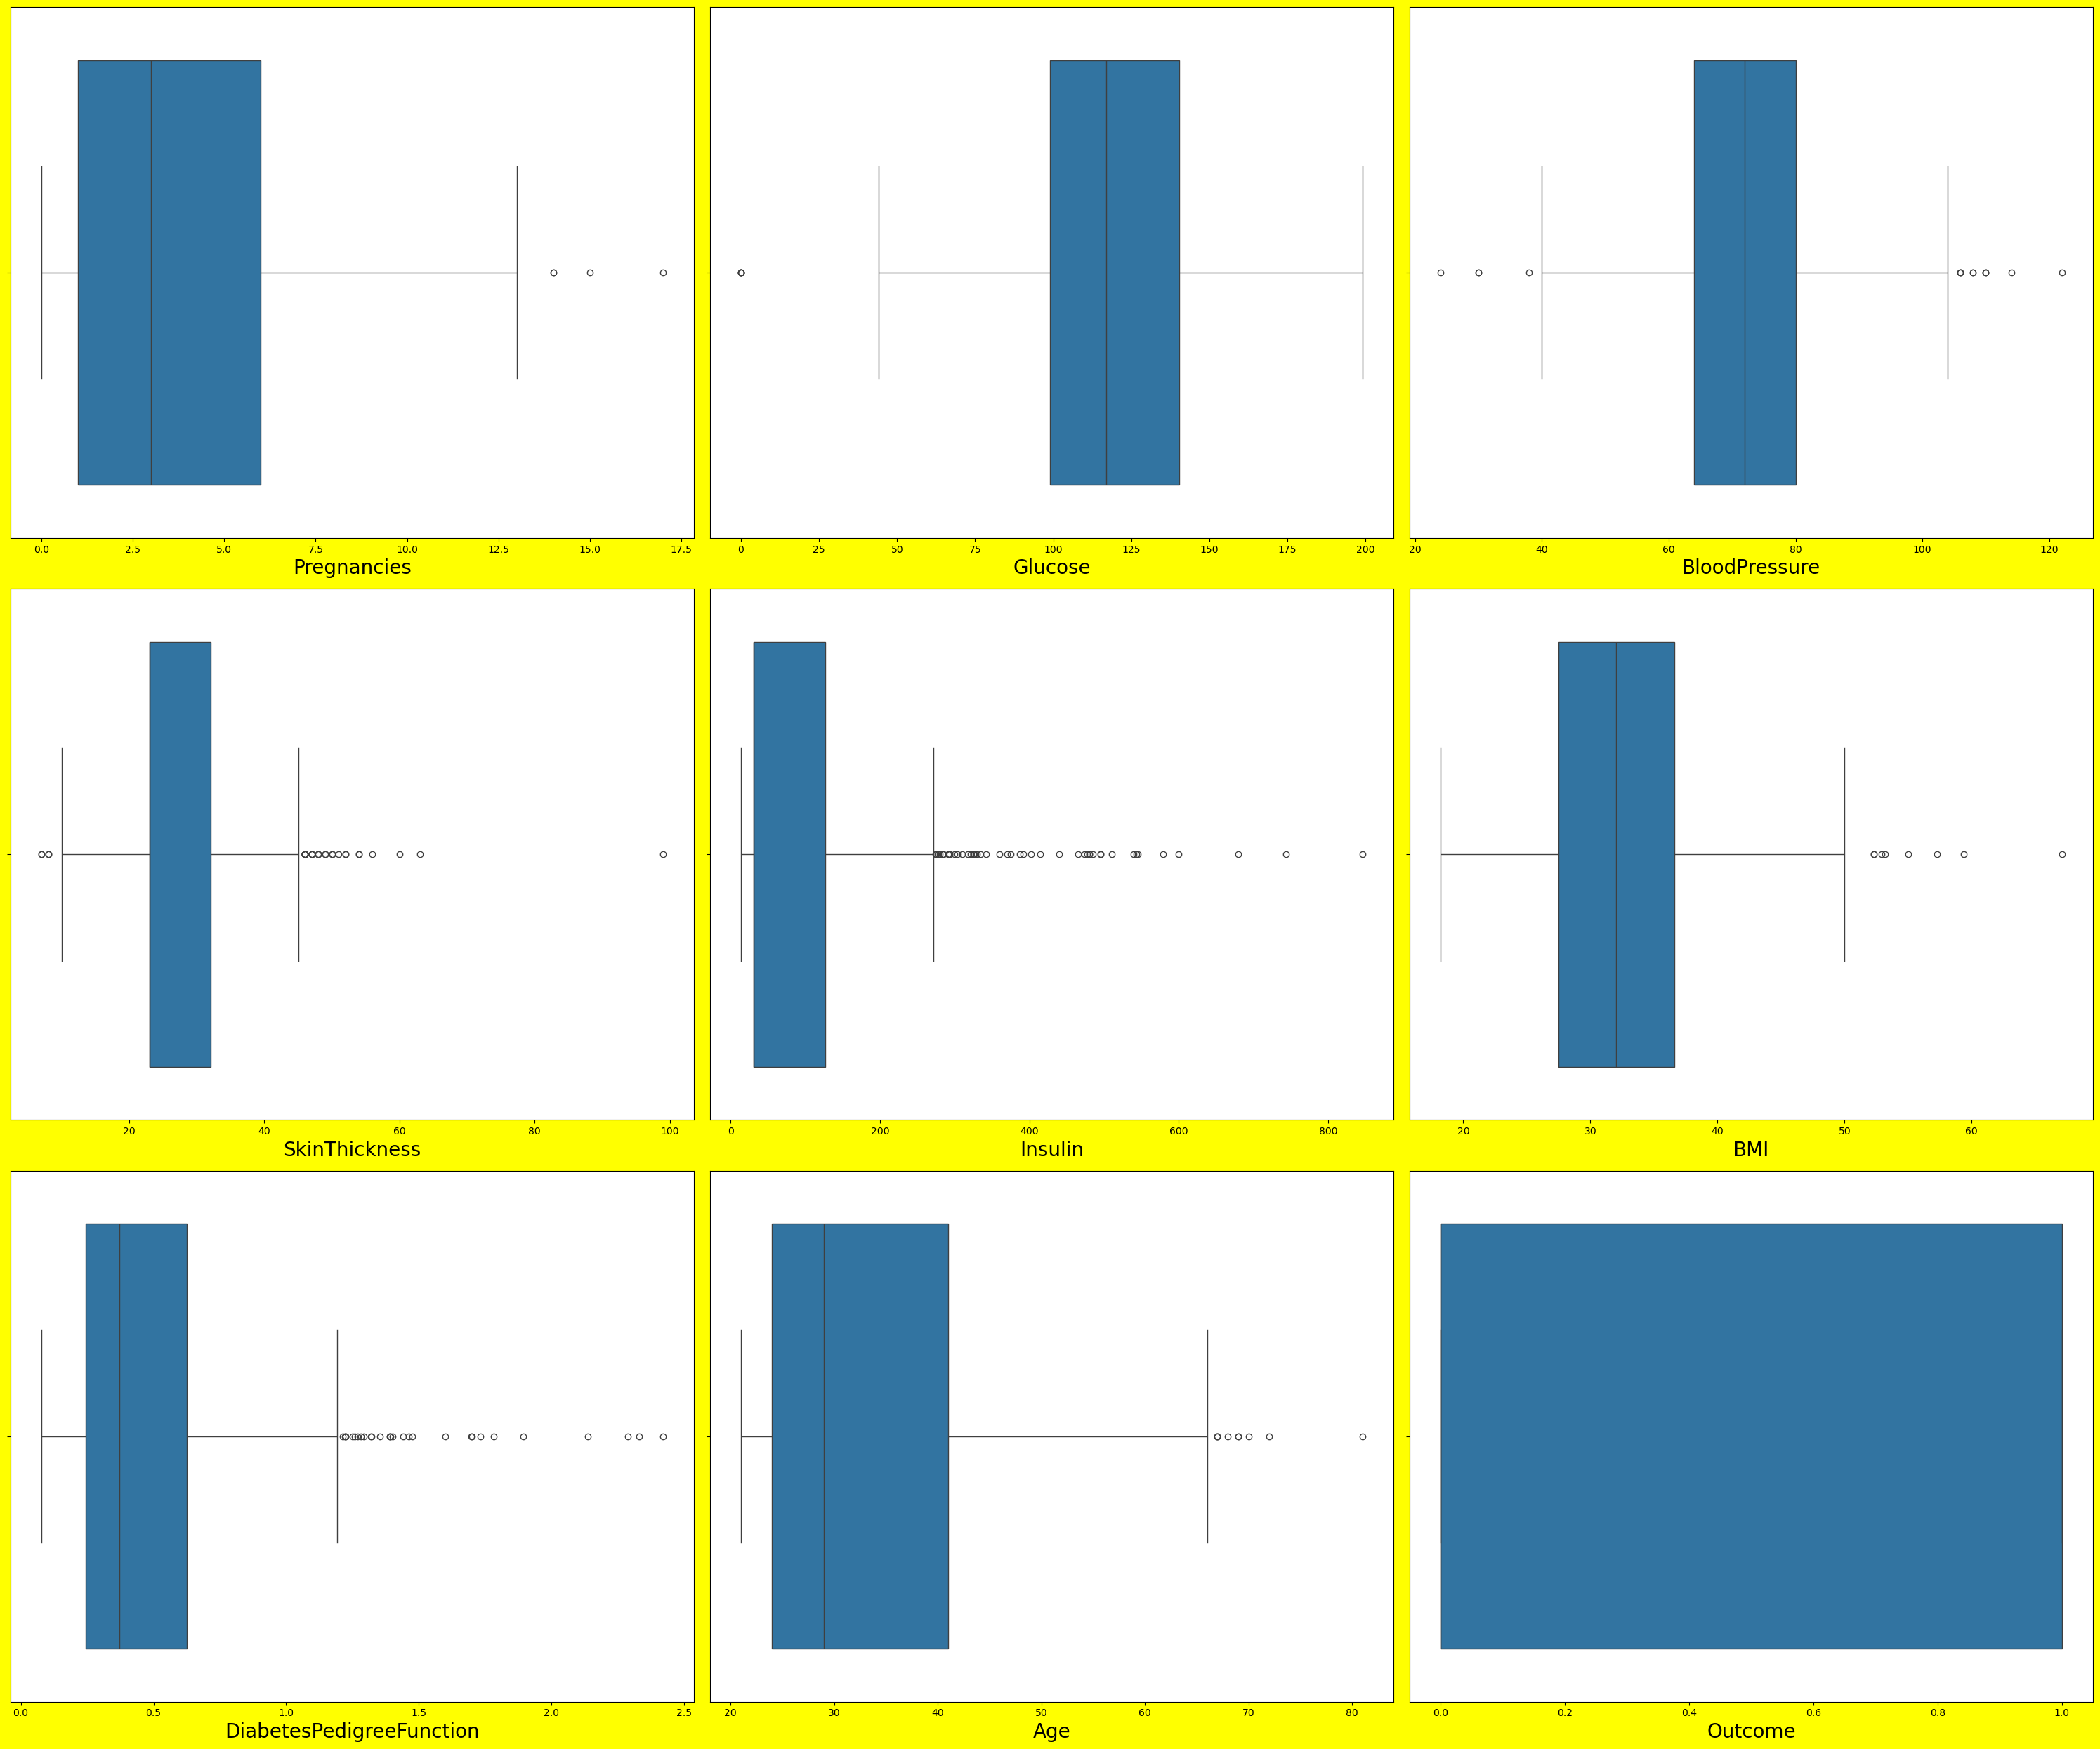

In [21]:
## step 4-Checking the outliers

plt.figure(figsize=(30,25),facecolor='yellow')
plotnumber=1

for column in data:
    plt.subplot(3,3,plotnumber)
    sns.boxplot(x=data[column])
    plt.xlabel(column,fontsize=20)

    plotnumber+=1
plt.tight_layout()    

<Axes: xlabel='Pregnancies'>

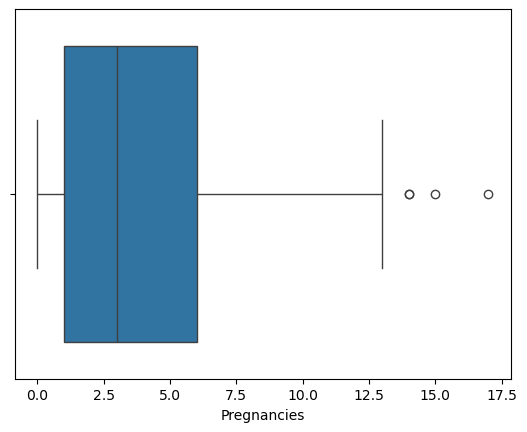

In [23]:
sns.boxplot(x=data['Pregnancies'])

In [65]:
data.Pregnancies.value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [25]:
np.median(data.Pregnancies)

3.0

In [27]:
# handling outliers

data.loc[data['Pregnancies']>13,'Pregnancies']=1

<Axes: xlabel='Pregnancies'>

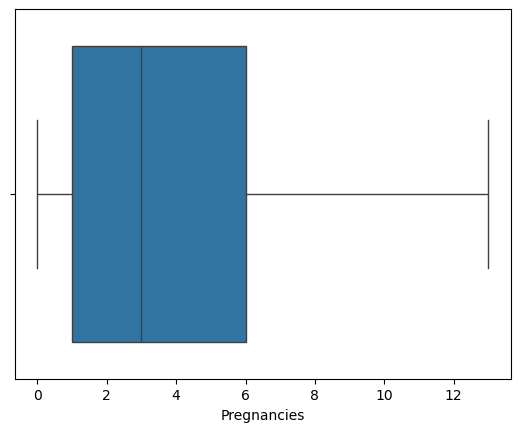

In [73]:
sns.boxplot(x=data['Pregnancies'])

In [77]:
data.BloodPressure.unique()

array([ 72,  66,  64,  40,  74,  50,  70,  96,  92,  80,  60,  84,  30,
        88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,  85,
        86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,  46,
       102, 100,  61,  24,  38, 106, 114], dtype=int64)

In [79]:
data.BloodPressure.value_counts()

BloodPressure
72     79
70     57
74     52
78     45
68     45
64     43
80     40
76     39
60     37
62     34
66     30
82     30
88     25
84     23
90     22
58     21
86     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
94      6
85      6
48      5
96      4
44      4
98      3
100     3
106     3
110     3
55      2
30      2
104     2
46      2
108     2
61      1
38      1
24      1
122     1
102     1
95      1
40      1
114     1
Name: count, dtype: int64

In [83]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [29]:
np.median(data['BloodPressure'])

72.0

In [33]:
data.loc[data['BloodPressure']<40,'BloodPressure']=np.median(data['BloodPressure'])

In [91]:
data.SkinThickness.unique()

array([35, 29, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31, 37,
       42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40, 51,
       56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99],
      dtype=int64)

<Axes: xlabel='SkinThickness'>

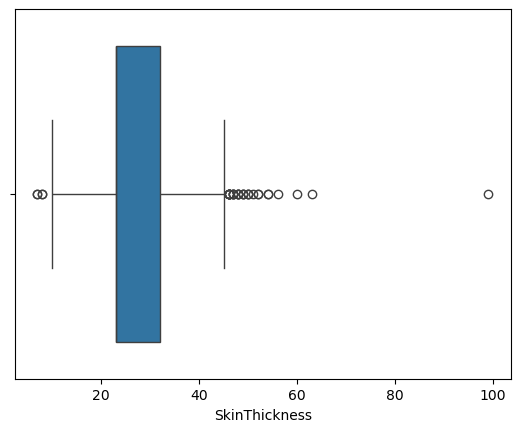

In [35]:
sns.boxplot(x=data['SkinThickness'])

In [37]:
data.loc[data['SkinThickness']>43,'SkinThickness']=np.median(data['SkinThickness'])

In [39]:
data.loc[data['SkinThickness']<12,'SkinThickness']=np.median(data['SkinThickness'])

<Axes: xlabel='SkinThickness'>

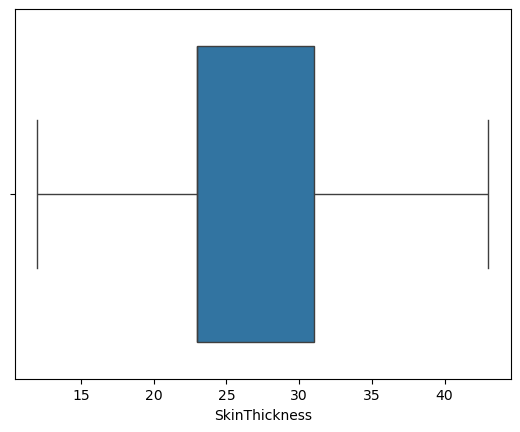

In [113]:
sns.boxplot(x=data['SkinThickness'])

<Axes: xlabel='Insulin'>

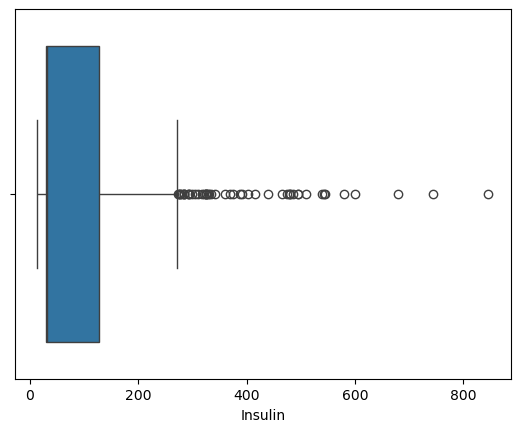

In [41]:
sns.boxplot(x=data['Insulin'])

In [43]:
data.loc[data['Insulin']>550,'Insulin']=np.median(data['Insulin'])

In [45]:
data.loc[data['BMI']>50,'BMI']=np.median(data['BMI'])

In [47]:
data.loc[data['DiabetesPedigreeFunction']>1.7,'DiabetesPedigreeFunction']=np.median(data['DiabetesPedigreeFunction'])

In [49]:
data.loc[data['Age']>70,'Age']=np.median(data['Age'])

In [51]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.6270,50,1
1,1,85,66,29,30.5,26.6,0.3510,31,0
2,8,183,64,23,30.5,23.3,0.6720,32,1
3,1,89,66,23,94.0,28.1,0.1670,21,0
4,0,137,40,35,168.0,43.1,0.3725,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,23,180.0,32.9,0.1710,63,0
764,2,122,70,27,30.5,36.8,0.3400,27,0
765,5,121,72,23,112.0,26.2,0.2450,30,0
766,1,126,60,23,30.5,30.1,0.3490,47,1


In [53]:
#step5-- Scaling data

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
d1=['Pregnancies','Outcome']
data1=sc.fit_transform(data.drop(d1,axis=1))

In [131]:
data1

array([[0.74371859, 0.3902439 , 0.74193548, ..., 0.48427673, 0.33867983,
        0.59183673],
       [0.42713568, 0.31707317, 0.5483871 , ..., 0.26415094, 0.16841456,
        0.20408163],
       [0.91959799, 0.29268293, 0.35483871, ..., 0.16037736, 0.36644047,
        0.2244898 ],
       ...,
       [0.6080402 , 0.3902439 , 0.35483871, ..., 0.25157233, 0.10302283,
        0.18367347],
       [0.63316583, 0.24390244, 0.35483871, ..., 0.37421384, 0.16718075,
        0.53061224],
       [0.46733668, 0.36585366, 0.61290323, ..., 0.3836478 , 0.14620605,
        0.04081633]])

In [55]:
con_data=data[['Pregnancies','Outcome']]
con_data

,Pregnancies,Outcome
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [135]:
data.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [57]:
data2=pd.DataFrame(data1,columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [59]:
data2

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.743719,0.390244,0.741935,0.031073,0.484277,0.338680,0.591837
1,0.427136,0.317073,0.548387,0.031073,0.264151,0.168415,0.204082
2,0.919598,0.292683,0.354839,0.031073,0.160377,0.366440,0.224490
3,0.447236,0.317073,0.354839,0.150659,0.311321,0.054904,0.000000
4,0.688442,0.000000,0.741935,0.290019,0.783019,0.181678,0.244898
...,...,...,...,...,...,...,...
763,0.507538,0.439024,0.354839,0.312618,0.462264,0.057372,0.857143
764,0.613065,0.365854,0.483871,0.031073,0.584906,0.161629,0.122449
765,0.608040,0.390244,0.354839,0.184557,0.251572,0.103023,0.183673
766,0.633166,0.243902,0.354839,0.031073,0.374214,0.167181,0.530612


In [61]:
final_df=pd.concat([data2,con_data],axis=1)

In [63]:
final_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0.743719,0.390244,0.741935,0.031073,0.484277,0.338680,0.591837,6,1
1,0.427136,0.317073,0.548387,0.031073,0.264151,0.168415,0.204082,1,0
2,0.919598,0.292683,0.354839,0.031073,0.160377,0.366440,0.224490,8,1
3,0.447236,0.317073,0.354839,0.150659,0.311321,0.054904,0.000000,1,0
4,0.688442,0.000000,0.741935,0.290019,0.783019,0.181678,0.244898,0,1
...,...,...,...,...,...,...,...,...,...
763,0.507538,0.439024,0.354839,0.312618,0.462264,0.057372,0.857143,10,0
764,0.613065,0.365854,0.483871,0.031073,0.584906,0.161629,0.122449,2,0
765,0.608040,0.390244,0.354839,0.184557,0.251572,0.103023,0.183673,5,0
766,0.633166,0.243902,0.354839,0.031073,0.374214,0.167181,0.530612,1,1


# Feature Selection

In [150]:
data2.corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Glucose,1.000000,0.210989,0.100795,0.327065,0.214757,0.084020,0.266193
BloodPressure,0.210989,1.000000,0.098248,-0.035061,0.273000,0.012182,0.330382
SkinThickness,0.100795,0.098248,1.000000,0.205318,0.465440,0.085721,0.038552
Insulin,0.327065,-0.035061,0.205318,1.000000,0.191216,0.139681,-0.037431
BMI,0.214757,0.273000,0.465440,0.191216,1.000000,0.098124,0.066062
DiabetesPedigreeFunction,0.084020,0.012182,0.085721,0.139681,0.098124,1.000000,0.051866
Age,0.266193,0.330382,0.038552,-0.037431,0.066062,0.051866,1.000000


<Axes: >

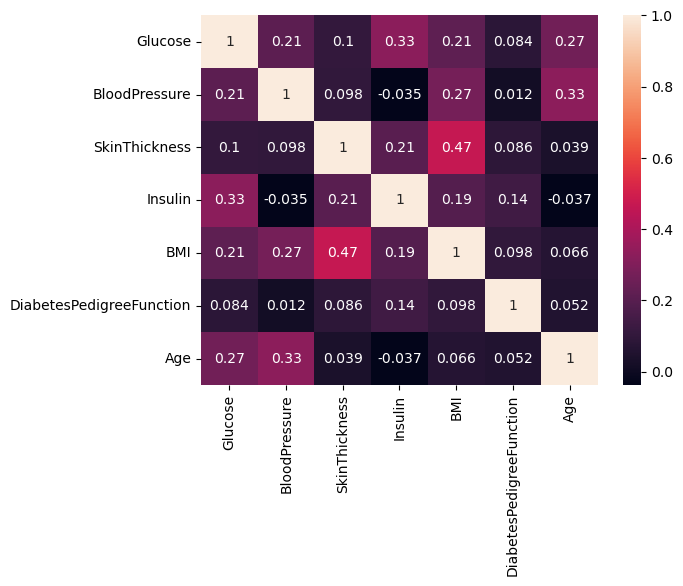

In [158]:
sns.heatmap(data2.corr(),annot=True)

### So no correlation hence no features should be removed

# Model Creation

In [65]:
final_df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0.743719,0.390244,0.741935,0.031073,0.484277,0.338680,0.591837,6,1
1,0.427136,0.317073,0.548387,0.031073,0.264151,0.168415,0.204082,1,0
2,0.919598,0.292683,0.354839,0.031073,0.160377,0.366440,0.224490,8,1
3,0.447236,0.317073,0.354839,0.150659,0.311321,0.054904,0.000000,1,0
4,0.688442,0.000000,0.741935,0.290019,0.783019,0.181678,0.244898,0,1


In [67]:
## step1-Creating dependent and independent variable seperately

X=final_df.iloc[:,:-1]       #independent

y=final_df.Outcome

In [69]:
X

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies
0,0.743719,0.390244,0.741935,0.031073,0.484277,0.338680,0.591837,6
1,0.427136,0.317073,0.548387,0.031073,0.264151,0.168415,0.204082,1
2,0.919598,0.292683,0.354839,0.031073,0.160377,0.366440,0.224490,8
3,0.447236,0.317073,0.354839,0.150659,0.311321,0.054904,0.000000,1
4,0.688442,0.000000,0.741935,0.290019,0.783019,0.181678,0.244898,0
...,...,...,...,...,...,...,...,...
763,0.507538,0.439024,0.354839,0.312618,0.462264,0.057372,0.857143,10
764,0.613065,0.365854,0.483871,0.031073,0.584906,0.161629,0.122449,2
765,0.608040,0.390244,0.354839,0.184557,0.251572,0.103023,0.183673,5
766,0.633166,0.243902,0.354839,0.031073,0.374214,0.167181,0.530612,1


In [71]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [77]:
# step2-creating the training and testing data

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=45,test_size=0.25)

In [73]:
final_df.shape

(768, 9)

In [180]:
y_train.shape

(576,)

In [182]:
y_test.shape

(192,)

In [79]:
### step3- Model Creation

from sklearn.linear_model import LogisticRegression

clf=LogisticRegression()

clf.fit(X_train,y_train)    # training the model

LogisticRegression()

In [81]:
## step4-prediction

y_pred=clf.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [83]:
# acurracy

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.7291666666666666

In [85]:
y_pred         # model predicted values

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [87]:
y_test       #actual values

195    1
51     0
66     1
437    0
665    0
      ..
671    0
422    0
742    0
331    0
699    0
Name: Outcome, Length: 192, dtype: int64

In [89]:
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob

array([[0.35468183, 0.64531817],
       [0.89726429, 0.10273571],
       [0.66393497, 0.33606503],
       [0.58706529, 0.41293471],
       [0.81933542, 0.18066458],
       [0.81457116, 0.18542884],
       [0.48018154, 0.51981846],
       [0.93965442, 0.06034558],
       [0.36044014, 0.63955986],
       [0.89970975, 0.10029025],
       [0.25195305, 0.74804695],
       [0.52127692, 0.47872308],
       [0.90393582, 0.09606418],
       [0.48934895, 0.51065105],
       [0.68969419, 0.31030581],
       [0.90567812, 0.09432188],
       [0.04605086, 0.95394914],
       [0.53147537, 0.46852463],
       [0.4344936 , 0.5655064 ],
       [0.92638718, 0.07361282],
       [0.55153133, 0.44846867],
       [0.78349211, 0.21650789],
       [0.48996824, 0.51003176],
       [0.80835627, 0.19164373],
       [0.98605735, 0.01394265],
       [0.34335919, 0.65664081],
       [0.87611133, 0.12388867],
       [0.43464388, 0.56535612],
       [0.22798001, 0.77201999],
       [0.8069307 , 0.1930693 ],
       [0.

In [91]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [93]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[110  20]
 [ 32  30]]


In [101]:
accuracy_score(y_test,y_pred)

0.7291666666666666

In [103]:
recall_score(y_test,y_pred)

0.4838709677419355

In [105]:
precision_score(y_test,y_pred)

0.6

In [107]:
f1_score(y_test,y_pred)

0.5357142857142857

In [111]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       130
           1       0.60      0.48      0.54        62

    accuracy                           0.73       192
   macro avg       0.69      0.67      0.67       192
weighted avg       0.72      0.73      0.72       192



# Multiclass Classification

### Problem Statement :- Based on features like sepal,petal length and width predict the species of iris flower

In [118]:
df=pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [120]:
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'], dtype='object')

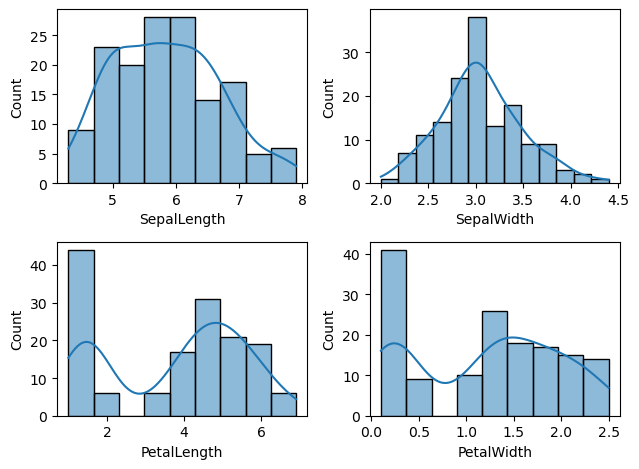

In [122]:
iris_column=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

plotnumber=1
for i in iris_column:
    plt.subplot(2,2,plotnumber)
    sns.histplot(x=df[i],kde=True)
    plotnumber+=1

plt.tight_layout()

<Axes: xlabel='SepalLength', ylabel='PetalLength'>

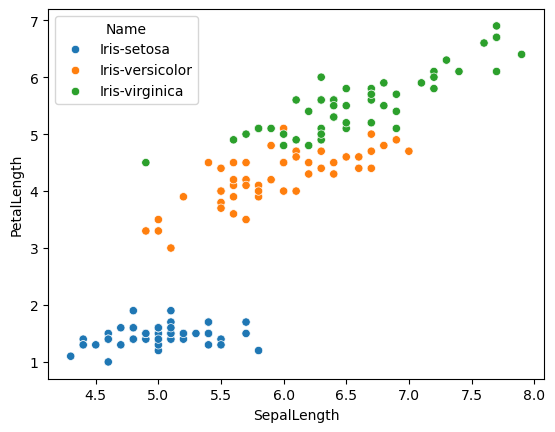

In [124]:
sns.scatterplot(x='SepalLength',y='PetalLength',data=df,hue='Name')

<Axes: xlabel='SepalLength', ylabel='SepalWidth'>

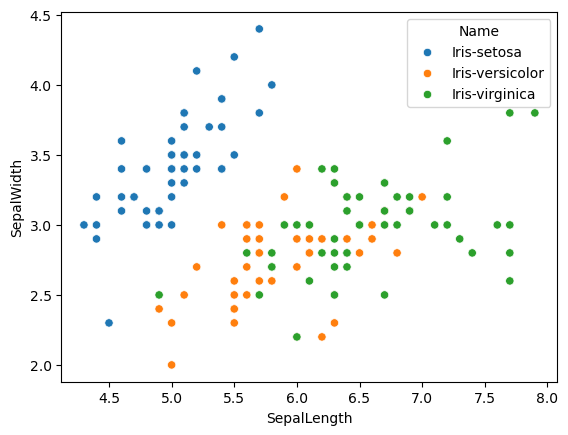

In [126]:
sns.scatterplot(x='SepalLength',y='SepalWidth',data=df,hue='Name')

In [128]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [130]:
df.Name.value_counts()

Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='SepalLength'>

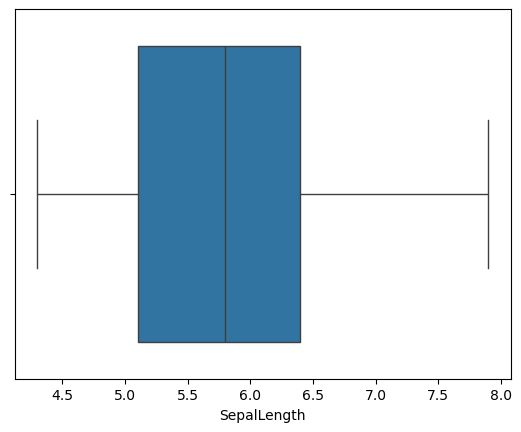

In [132]:
sns.boxplot(x=df['SepalLength'])

<Axes: xlabel='SepalWidth'>

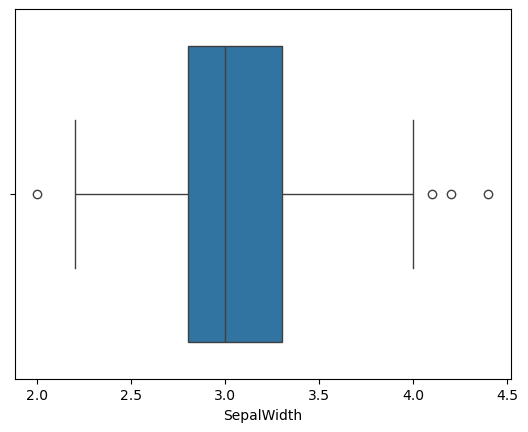

In [134]:
sns.boxplot(x=df['SepalWidth'])

In [136]:
df.loc[df['SepalWidth']>4,'SepalWidth']=np.median(df['SepalWidth'])

<Axes: xlabel='SepalWidth'>

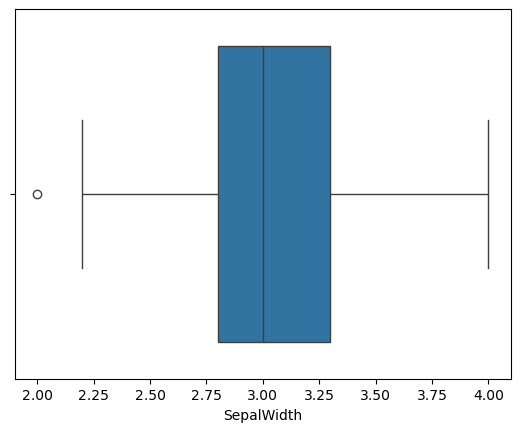

In [138]:
sns.boxplot(x=df['SepalWidth'])

In [144]:
df.loc[df['SepalWidth']<2.25,'SepalWidth']=np.median(df['SepalWidth'])

<Axes: xlabel='SepalWidth'>

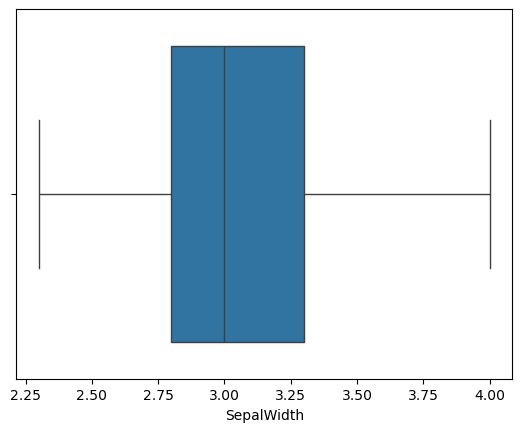

In [146]:
sns.boxplot(x=df['SepalWidth'])

<Axes: xlabel='PetalWidth'>

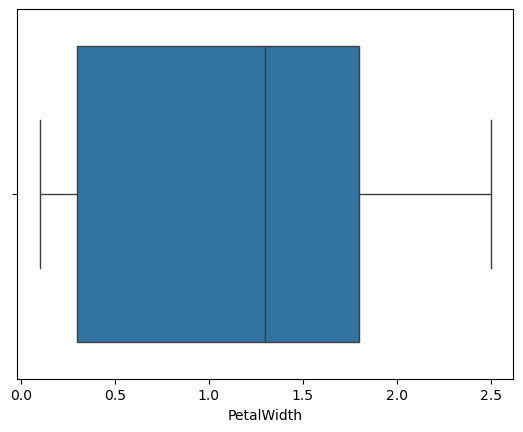

In [148]:
sns.boxplot(x=df['PetalWidth'])

In [150]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()

df['Name']=LE.fit_transform(df['Name'])

In [152]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Model Creation

In [155]:
X=df.iloc[:,:-1]   # Independent Features
y=df.Name          # Dependent Feature

In [157]:
X.shape

(150, 4)

In [159]:
y.shape

(150,)

In [161]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Name, dtype: int32

In [163]:
# Training and Testing Data

from sklearn.model_selection import train_test_split

X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,random_state=25)

In [165]:
X_train1.shape

(112, 4)

In [167]:
y_test1.shape

(38,)

In [169]:
from sklearn.linear_model import LogisticRegression

lr_multi=LogisticRegression()

lr_multi.fit(X_train1,y_train1)       # training the model

y_pred=lr_multi.predict(X_test1)      # prediction

In [171]:
y_test1.value_counts()

Name
1    16
0    11
2    11
Name: count, dtype: int64

In [173]:
cm=confusion_matrix(y_test1,y_pred)
print(cm)

[[11  0  0]
 [ 0 15  1]
 [ 0  0 11]]


In [175]:
accuracy_score(y_test1,y_pred)

0.9736842105263158

In [181]:
recall_score(y_test1,y_pred,average='weighted')

0.9736842105263158

In [183]:
precision_score(y_test1,y_pred,average='weighted')

0.975877192982456

In [185]:
f1_score(y_test1,y_pred,average='weighted')

0.973831844688861

In [187]:
cr=classification_report(y_test1,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.94      0.97        16
           2       0.92      1.00      0.96        11

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

